<a href="https://colab.research.google.com/github/ttjh1234/Study_MLDL/blob/main/Chapter03_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#선형회귀

농어의 무게 구하기 문제

첫 번째 방법으로 **K-최근접 이웃 회귀** 방법을 사용했지만, 

단점이 들어나며 이를 보완하기 위해

두 번째 방법으로 **선형회귀** 방법을 사용한다.

데이터는 https://bit.ly/perch_data 를 참조하여 사용하였다.

##데이터 준비

Chapter03_01과 같은 데이터를 사용하며, **K-최근접 이웃 회귀**의 **단점**을 알아본다.

In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

print(type(perch_length))
print(perch_length.shape)


<class 'numpy.ndarray'>
(56,)


sklearn의 **train_test_split**을 사용하여 train_set과 test_set을 나누고,

모형에 적합시키기 위해 **reshape()**을 사용하여 2차원 배열을 만들어준다.

In [2]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(perch_length,perch_weight,random_state=42)

In [3]:
x_train=x_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)
print(x_train.shape)
print(x_train[:5])

(42, 1)
[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]]


sklearn의 **KNeighborsRegressor**를 이용하여 K-최근접 이웃회귀 모형을 준비한다.

학습시킨 모형을 기반으로 길이가 50인 test_data를 넣고 예측했을 경우 

1033.33g 이라는 결과를 보여준다.

In [4]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=3)
knr.fit(x_train,y_train)
print(knr.predict([[50]]))

[1033.33333333]


matplotlib를 사용하여 test_data와 이웃하는 train_set의 데이터의 인덱스를 

활용하여 산점도를 찍어본다.

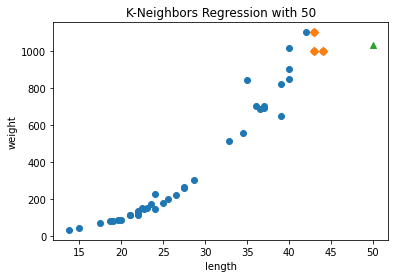

In [5]:
import matplotlib.pyplot as plt
distances, indexes = knr.kneighbors([[50]])
plt.scatter(x_train,y_train)
plt.scatter(x_train[indexes],y_train[indexes],marker='D')
plt.scatter(50,1033.3,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.title('K-Neighbors Regression with 50')
plt.show()

이번엔 길이가 **100** 인 농어가 있다고 가정하고, 다시 모형에 넣으면,


길이가 50인 농어의 결과와 **같은** 결과를 나타낸다.

길이가 100인 농어와 이웃한 train_set 데이터를 확인하고 산점도를 그리면

아래와 같다.

In [6]:
print(np.mean(y_train[indexes]))
print(knr.predict([[100]]))

1033.3333333333333
[1033.33333333]


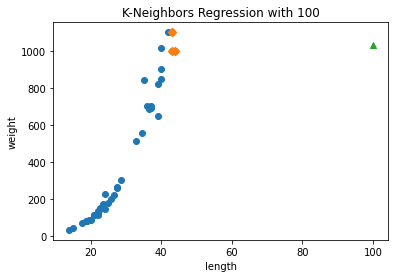

In [7]:
distances, indexes = knr.kneighbors([[100]])
plt.scatter(x_train,y_train)
plt.scatter(x_train[indexes],y_train[indexes],marker='D')
plt.scatter(100,1033.3,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.title('K-Neighbors Regression with 100')
plt.show()

##선형 회귀

위에서 살펴보았던 K-최근접 이웃 회귀의 가장 큰 단점은

학습한 모형 범위(train_set의 범위) 보다 **더 큰 데이터**가 들어왔을 때, 

**정확한 예측이 불가**하다는 점이다.

(왜냐하면 train_set에 위치한 **가장 가까운 데이**터들의 평균을 가지고 예측하기 때문.)

이를 해결하기 위해 **선형회귀**를 먼저 사용하겠다.

sklearn의 **LinearRegression** 를 통해 선형회귀를 진행해본다.

선형회귀는 **y=a*x+b** 를 토대로 직선의 방정식에서 계수와 절편을 찾는 문제가 된다.

위의 계수와 절편을 **ML 알고리즘**에서 **model parameter**라고 하며,

ML알고리즘의 훈련과정 중 최적의 model parameter를 찾는 것을 

**모델 기반 학습** 이라고 불린다.



In [8]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(x_train,y_train)
print(lr.predict([[50]]))
print(lr.coef_,lr.intercept_)

[1241.83860323]
[39.01714496] -709.0186449535477


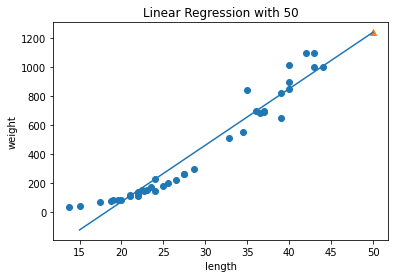

In [9]:
plt.scatter(x_train,y_train)
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])
plt.scatter(50,1241.8,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.title('Linear Regression with 50')
plt.show()

선형회귀를 사용한 모델에서 train_set과 test_set의 **R^2**을 보면

train_set과 test_set 두 점수 **모두 높지 않으며**, 

회귀 직선을 보면, length가 **줄어듦**에 따라 weight가 **음수**가 될 수 있음을 알 수 있다.

In [10]:
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))

0.9398463339976039
0.8247503123313558


##다항 회귀

선형 회귀에서 나타난 단점을 해결하기 위해 **다항 회귀**를 사용한다.

다항회귀를 사용하기 위해 **특성^2**이라는 새로운 특성을 만들어 사용한다.

In [11]:
x_train_poly=np.column_stack((x_train**2,x_train))
x_test_poly=np.column_stack((x_test**2,x_test))

print(x_train_poly[:5])
print(x_train_poly.shape,x_test_poly.shape)

[[ 384.16   19.6 ]
 [ 484.     22.  ]
 [ 349.69   18.7 ]
 [ 302.76   17.4 ]
 [1296.     36.  ]]
(42, 2) (14, 2)


마찬가지로 선형회귀와 같은 함수를 사용하지만,

데이터를 모형을 이용하여 예측할 때 같은 **형변환**을 해서 사용한다.

선형 회귀와는 다르게 계수를 보면 제곱항의 계수가 추가되며 나타난다.

In [12]:
lr=LinearRegression()
lr.fit(x_train_poly,y_train)
print(lr.predict([[50**2,50]]))
print(lr.coef_,lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278276


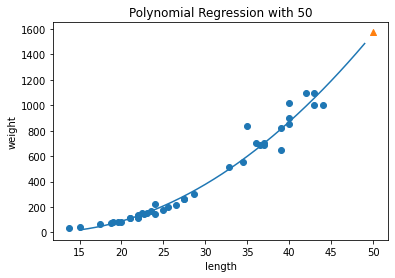

In [13]:
point=np.arange(15,50)
plt.scatter(x_train,y_train)
plt.plot(point,1.01*point**2-21.55*point+116.05)
plt.scatter(50,1574,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.title('Polynomial Regression with 50')
plt.show()

결과를 보면 **train_set과 test_set의 점수가 높아졌지만**,

**test_set의 점수가 더 높은 것으로 보아 아직까지 과소적합**이 남아있는 것을 확인할 수 있다.

이를 해결하기위해 조금 더 **복잡한** 모형이 필요할 것 같다.

In [14]:
print(lr.score(x_train_poly,y_train))
print(lr.score(x_test_poly,y_test))

0.9706807451768623
0.9775935108325122
